<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Data-Driven Finance

**Illustrated based on Different Types of Financial Data**

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

<p style='color: red;'><b>This notebook requires access to a number of APIs based on individual credentials; some of the APIs do not even work anymore the way they are used in the notebook. The notebook can only be used for illustation.</p></b>

## Imports

In [1]:
!git clone https://github.com/tpq-classes/ai_in_finance.git
import sys
sys.path.append('ai_in_finance')


Cloning into 'ai_in_finance'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 128 (delta 82), reused 50 (delta 36), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 2.77 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [24]:
!pip install git+https://github.com/yhilpisch/tpqoa

  Cloning https://github.com/yhilpisch/tpqoa to /tmp/pip-req-build-e1n41yal
  Running command git clone --filter=blob:none --quiet https://github.com/yhilpisch/tpqoa /tmp/pip-req-build-e1n41yal
  Resolved https://github.com/yhilpisch/tpqoa to commit 4a79f30b7095642844ef99741d9bfcb952e394db
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 3.8 MB/s eta 0:00:00
  Created wheel for tpqoa: filename=tpqoa-0.0.56-py3-none-any.whl size=11595 sha256=28462fc7f963af2a19a4a9bdf00a66a9788f78ff57b02f1d9e3c5c9e345e7cb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-nabl8nb4/wheels/57/7c/ca/f178e2b2385c72fdf70b681849f6d11c16cdd9a38c428e4920
  Created wheel for v20: filename=v20-3.0.25.0-py3-none-any.whl size=85779 sha256=3479b43dbb71e07317a785ef61f2460924fde8ee23f6c8f10714899f0fc1037f
  Stored in directory: /root/.cache/pip/wheels/

In [2]:
from fix_cufflink import *
cf_colors.to_rgba = fixed_to_rgba
cf_plotlytools.to_rgba = fixed_to_rgba

In [25]:
import math
import numpy as np
import pandas as pd
from pylab import plt
import plotly.io as pio
plt.style.use('seaborn-v0_8')
import cufflinks
cufflinks.set_config_file(offline=True)
pio.renderers.default = "colab"

In [4]:
import warnings as w; w.simplefilter('ignore')

## Scientific Method

### Problem

What is the standard gravity value $g$ on earth (earth-induced acceleration of an object towards the ground caused by gravity)?

See eg https://en.wikipedia.org/wiki/Gravity.

### Theory

The speed of an object is given by

$$v = a \cdot t$$

with $v$ the speed, $a$ acceleration and $t$ the time for which acceleration takes place.

The distance  $d$ an object covers over a period of $t$ with speed $v$ is

$$d = v \cdot t$$

One also gets

$$d = a \cdot t^2$$

or

$$a = \frac{d}{t^2}$$

### Experiment

We let an object drop to the ground from different heights $h$ and measure the times $t$ it takes until the object reaches the ground.

Hypothesis: the gravity value $g$ is dependent of the height.

### Measurements

In [5]:
h = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4])

We simulate experimental data through the relationship

$$t = \sqrt{\frac{h}{g}} + \epsilon = \sqrt{\frac{h}{9.80665}} + \epsilon$$

where $\epsilon$ represents zero-mean (measurement) noise.

In [6]:
t = np.sqrt(h / 9.80665) + np.random.standard_normal(len(h)) / 5000
t

array([0.31958282, 0.39158999, 0.45158809, 0.50482639, 0.55295473,
       0.59692328, 0.63901238])

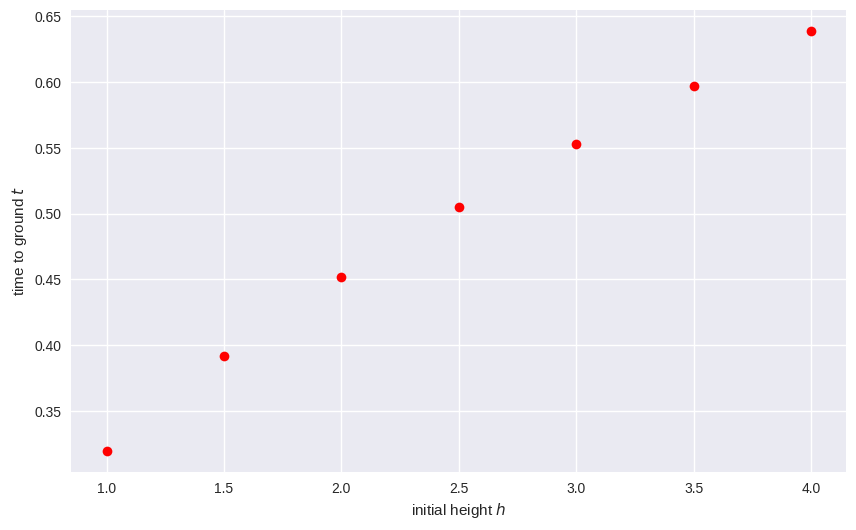

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(h, t, 'ro')
plt.xlabel('initial height $h$')
plt.ylabel('time to ground $t$');

At first inspection, the relationship between $t$ and $h$ seems linear.

However, adding observations with larger values for $h$ shows that it is not linear.

In [8]:
h = np.array([0.01, 1, 1.5, 2, 2.5, 3, 3.5, 4, 8, 16, 32, 64])
t = np.sqrt(h / 9.80665) + np.random.standard_normal(len(h)) / 5000

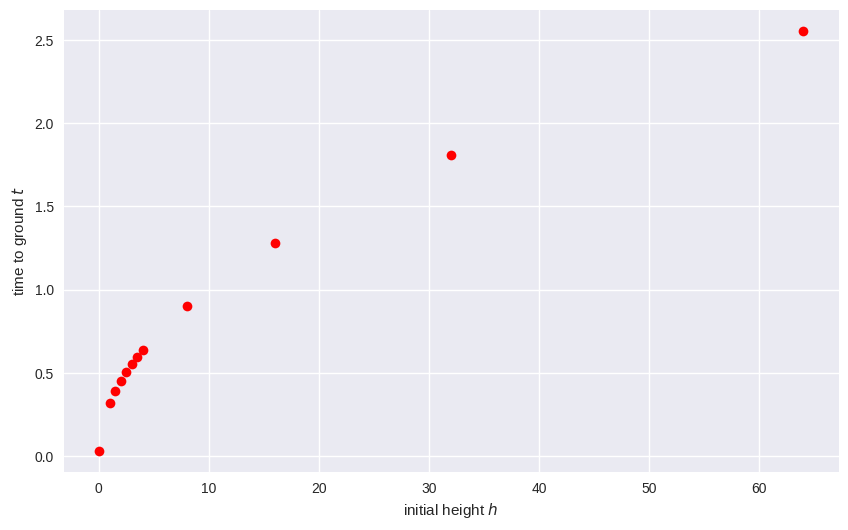

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(h, t, 'ro')
plt.xlabel('initial height $h$')
plt.ylabel('time to ground $t$');

Given the measurements (the data), a new hypothesis can be formulated:

$$t = c \cdot \sqrt{h}$$

### First Results

Plugging in the data to the formula $c^2 = \frac{h}{t^2}$ gives

In [10]:
c2 = h / t ** 2
c2.round(5)

array([9.89205, 9.80475, 9.79289, 9.78919, 9.80822, 9.80939, 9.80392,
       9.8034 , 9.8068 , 9.80912, 9.80638, 9.8053 ])

We can identify $c^2$ with $g$, the gravity value.

All these values are pretty close to each other.

Taking the average already gives a good estimate for (the real) $g$.

In [11]:
g = c2
g.mean()

np.float64(9.810952474219258)

### More Data

Let us do more experiements. This time the height is fixed to $h=1$ meter.

In [12]:
h = np.array(1000 * [1,])
t = np.sqrt(h / 9.80665) + np.random.standard_normal(len(h)) / 5000

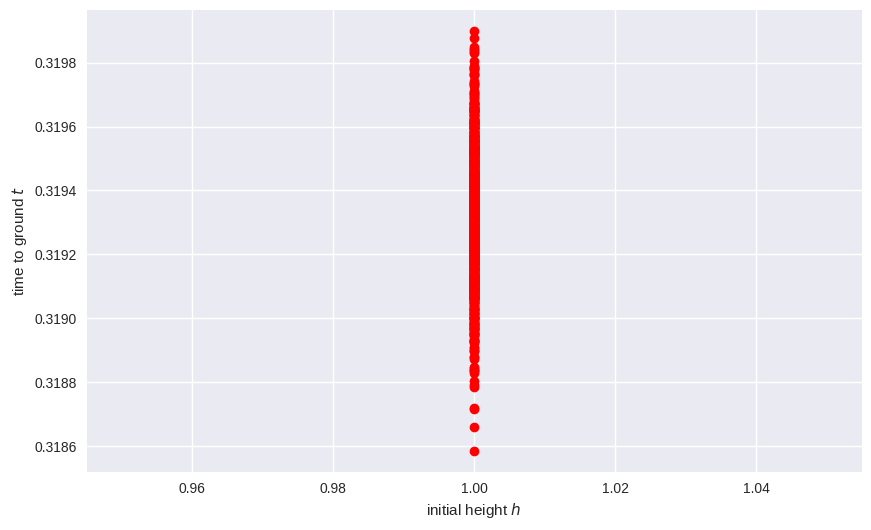

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(h, t, 'ro')
plt.xlabel('initial height $h$')
plt.ylabel('time to ground $t$');

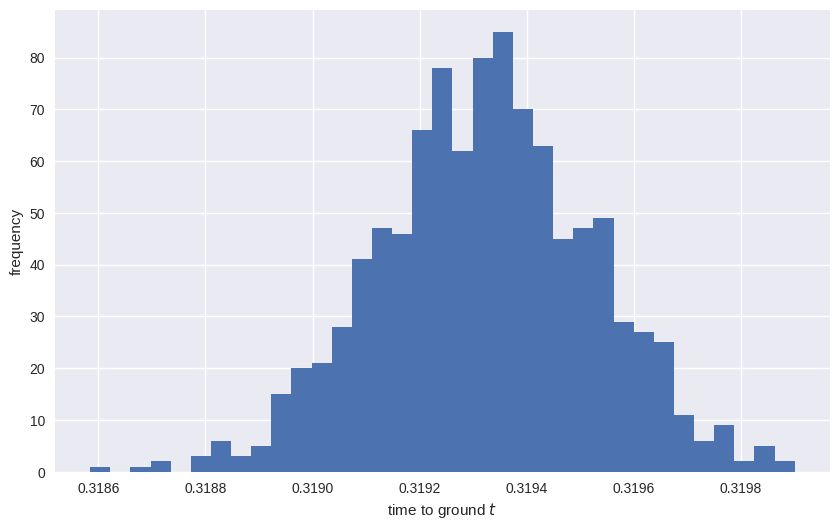

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(t, bins=35)
plt.ylabel('frequency')
plt.xlabel('time to ground $t$');

With more data, the estimate is more accurate (given simulated measurement zero-mean noise).

In [15]:
g = h / t ** 2
g.mean()

np.float64(9.8071246729505)

## Structured Data

### EOD Data

In [16]:
url = 'http://hilpisch.com/tr_eikon_eod_data.csv'

In [17]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [18]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2138 non-null   float64
 9   XAU=    2138 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 217.1 KB


In [19]:
symbols = ['AAPL.O', 'MSFT.O', 'INTC.O']

In [20]:
data = raw[symbols].copy()

In [21]:
rets = np.log(data / data.shift(1)).dropna()

In [26]:
data.normalize().iplot()

### Intraday Data

See https://github.com/yhilpisch/tpqoa.

In [27]:
import tpqoa

In [ ]:
oanda = tpqoa.tpqoa('/notebooks/data/pyalgo.cfg')

In [ ]:
symbol = 'EUR_USD'

In [ ]:
raw = oanda.get_history(symbol, '2019-02-04', '2019-02-06', 'M1', 'A')

In [ ]:
raw.info()

In [ ]:
raw['c'].iplot()

### Tick Data &mdash; Historical

See https://fxcmpy.tpq.io.

In [ ]:
import fxcmpy
import datetime as dt
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [ ]:
fxcm = fxcmpy.fxcmpy(config_file='/notebooks/data/pyalgo.cfg')

In [ ]:
data = fxcm.get_candles('EUR/USD', period='m1', number=250)

In [ ]:
(data['askclose'] - data['bidclose']).mean()

In [ ]:
data[['askclose', 'bidclose']].iplot()

In [ ]:
start = dt.datetime(2018, 12, 1)
end = dt.datetime(2018, 12, 7)

In [ ]:
tick = tdr('EURUSD', start, end, verbosity=True)

In [ ]:
tick.get_raw_data().info()

In [ ]:
%time ticks = tick.get_data()

In [ ]:
ticks.iloc[::100].iplot()

### Tick Data &mdash; Streaming

In [ ]:
oanda.stream_data('EUR_USD', stop=10)

## Unstructured Data

### Texts

In [ ]:
!apt install poppler-utils

In [ ]:
!pip install lxml[html_clean]

`brew cask install pdftotext`

In [ ]:
!pdftotext /content/ai_in_finance/Walden-by-Henry-David-Thoreau.pdf /content/ai_in_finance/Walden-by-Henry-David-Thoreau.txt

In [ ]:
ls /content/ai_in_finance/Wa*

In [ ]:
fn = '/content/ai_in_finance/Walden-by-Henry-David-Thoreau.txt'

In [ ]:
!head -n 20 $fn

In [ ]:
%time f = open(fn, 'r').read()

In [ ]:
f.split('\n')[40]

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

In [ ]:
import nlp_functions as nlp

In [ ]:

nlp.generate_word_cloud(f, 40)

### Dow Jones DNA

In [ ]:
musk = pd.read_hdf('/content/ai_in_finance/snapshot_musk_100.h5')

In [ ]:
musk.info()

In [ ]:
musk[['title', 'publisher_name', 'publication_date']].head()

In [ ]:
musk['body'].head()

## Alternative Data

### Web

In [ ]:
import requests

In [ ]:
sources = [
    'https://nr.apple.com/dE0b1T5G3u',  # iPad Pro
    'https://nr.apple.com/dE4c7T6g1K',  # MacBook Air
    'https://nr.apple.com/dE4q4r8A2A',  # Mac Mini
]

In [ ]:
html = [requests.get(url).text for url in sources]

In [ ]:
data = [nlp.clean_up_text(t) for t in html]

In [ ]:
data[0][535:1000]

### Twitter

Developer documentation for Twitter: https://developer.twitter.com/en/docs

In [ ]:
import configparser as cp
from twitter import Twitter, OAuth

In [ ]:
cfg = cp.ConfigParser()
cfg.read('dyjh.cfg')

In [ ]:
t = Twitter(auth=OAuth(cfg['twitter']['access_token'],
                       cfg['twitter']['access_secret_token'],
                       cfg['twitter']['api_key'],
                       cfg['twitter']['api_secret_key']),
           retry=True)

In [ ]:
l = t.statuses.home_timeline(count=5)

In [ ]:
for e in l:
    print(e['text'])

In [ ]:
l = t.statuses.user_timeline(screen_name='dyjh', count=5)

In [ ]:
for e in l:
    print(e['text'])

In [ ]:
d = t.search.tweets(q='#Python', count=5)

In [ ]:
for e in d['statuses']:
    print(e['text'])

In [ ]:
l = t.statuses.user_timeline(screen_name='realDonaldTrump', count=75)

In [ ]:
tl = [e['text'] for e in l]

In [ ]:
tl[-5:]

In [ ]:
nlp.generate_word_cloud(' '.join(tl), 35)

## Eikon

### Price Data

In [ ]:
import eikon as ek

In [ ]:
ek.set_app_key(cfg['eikon']['app_id'])

In [ ]:
rics = [
    'GE',  # General Electric stock
    'AAPL.O',  # Apple stock
    '.SPX',  # S&P 500 stock index
    '.VIX',  # VIX volatility index
    'EUR=',  # EUR/USD exchange rate
    'XAU=',  # Gold price
    'DE10YT=RR',  # 10yr Bund price
]

In [ ]:
data = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2018-01-01',  # start date
                         end_date='2019-02-08')  # end date

In [ ]:
data.head()  # first five rows

In [ ]:
data = ek.get_timeseries(rics,  # RICs
              fields='CLOSE',  # fields to be retrieved
              start_date='2020-02-07 14:00:00',  # start time
              end_date='2020-02-07 18:00:00',  # end time
              interval='minute')  # bar length

In [ ]:
data.head()

In [ ]:
data.normalize().iplot()

### Fundamentals

In [ ]:
data_grid, err = ek.get_data(['AAPL.O', 'IBM', 'GOOG.O', 'MSFT.O'],
        ['TR.TotalReturnYTD', 'TR.WACCBeta', 'YRHIGH', 'YRLOW', 'TR.GrossProfit'])

In [ ]:
data_grid

In [ ]:
data_grid.set_index('Instrument')[['YTD Total Return', 'Beta']].iplot(
                    kind='bar', subplots=True)

In [ ]:
data_grid.set_index('Instrument')[['YRHIGH', 'YRLOW']].iplot(kind='bar')

In [ ]:
data_grid.set_index('Instrument')['Gross Profit'].iplot(kind='bar')

### News

In [ ]:
news = ek.get_news_headlines('R:TSLA.O PRODUCTION',
                         date_from='2020-05-01',
                         date_to='2020-05-08',
                         count=5
                        )

In [ ]:
news

In [ ]:
storyId = news['storyId'][0]

In [ ]:
from IPython.display import HTML

In [ ]:
HTML(ek.get_news_story(storyId))

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">